In [1]:
import matplotlib.pyplot as plt
import math
import sympy as sp
import time
import numpy as np
import random
import sys

In [2]:
player_1 = "Sophia"
player_2 = "Mateo"

def check_argument_count():
    if (len(sys.argv) !=2):
        print("Falta el nombre de archivo con los datos")
        sys.exit(1)

def take_filename_argument():
    return sys.argv[1]

def extract_coins_data_from_file(file):
    coins = []
    try:
        with open(file, 'r') as data_file:
            next(data_file)
            for line in data_file:
                line = line.strip()
                coins_data = line.split(";")
                for coin in coins_data:
                    coins.append(int(coin))
        return coins
    except FileNotFoundError:
        print(f"Error: El archivo '{file}' no existe.")
        sys.exit(1)

def play_the_game(coins):
    start_time = time.time()

    player_1_points = 0
    player_2_points = 0
    while coins:
        player_1_points += sophia_play_taking_higher_coin(coins)
        player_2_points += mateo_play_taking_lowest_coin(coins)
    
    end_time = time.time()
    return (end_time - start_time)

def sophia_play_taking_higher_coin(coins):
    if coins[0]>coins[-1]:
        return coins.pop(0)
    else:
        return coins.pop()

def mateo_play_taking_lowest_coin(coins):
    if coins:
        if coins[0]>coins[-1]:
            return coins.pop()
        else:
            return coins.pop(0)
    return 0

GRAFICO 1

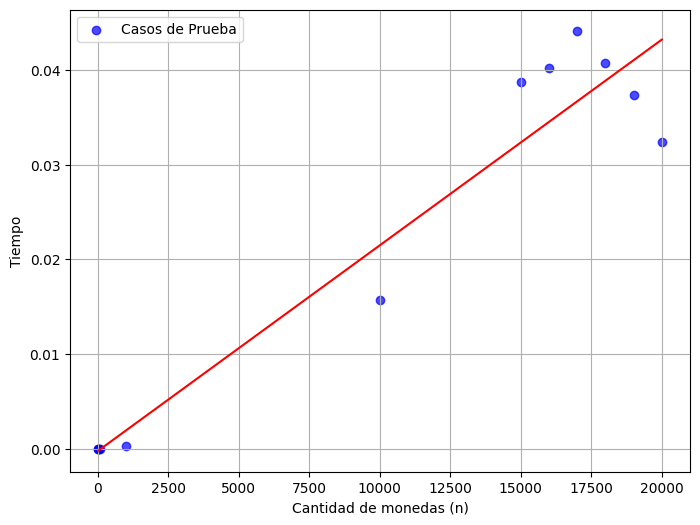

In [3]:
def main_0():
    files = [
        "20.txt",
        "25.txt",
        "50.txt",
        "100.txt",
        "1000.txt",
        "10000.txt",
        "15000.txt",
        "16000.txt",
        "17000.txt",
        "18000.txt",
        "19000.txt",
        
        "20000.txt",
    ]
    amount = [20, 25, 50, 100,1000, 10000, 15000, 16000, 17000, 18000, 19000, 20000]
    times = []
    
    for file in files:
        t = 0
        for i in range(10): 
            coins = extract_coins_data_from_file(file)
            time = play_the_game(coins)  
            t += time
        times.append(t / 10)  
    
    plot_least_squares(amount, times)  

def plot_least_squares(amount, times):
    
    coef = np.polyfit(amount, times, 1) 
    poly1d_fn = np.poly1d(coef)
      
    plt.figure(figsize=(8, 6))
    plt.scatter(amount, times, label='Casos de Prueba', color='blue', alpha=0.7)
    plt.plot(amount, poly1d_fn(amount), 'r')
    plt.xlabel('Cantidad de monedas (n)')
    plt.ylabel('Tiempo')
    plt.legend()
    plt.grid(True)
    plt.show()

main_0()

GRAFICO 2

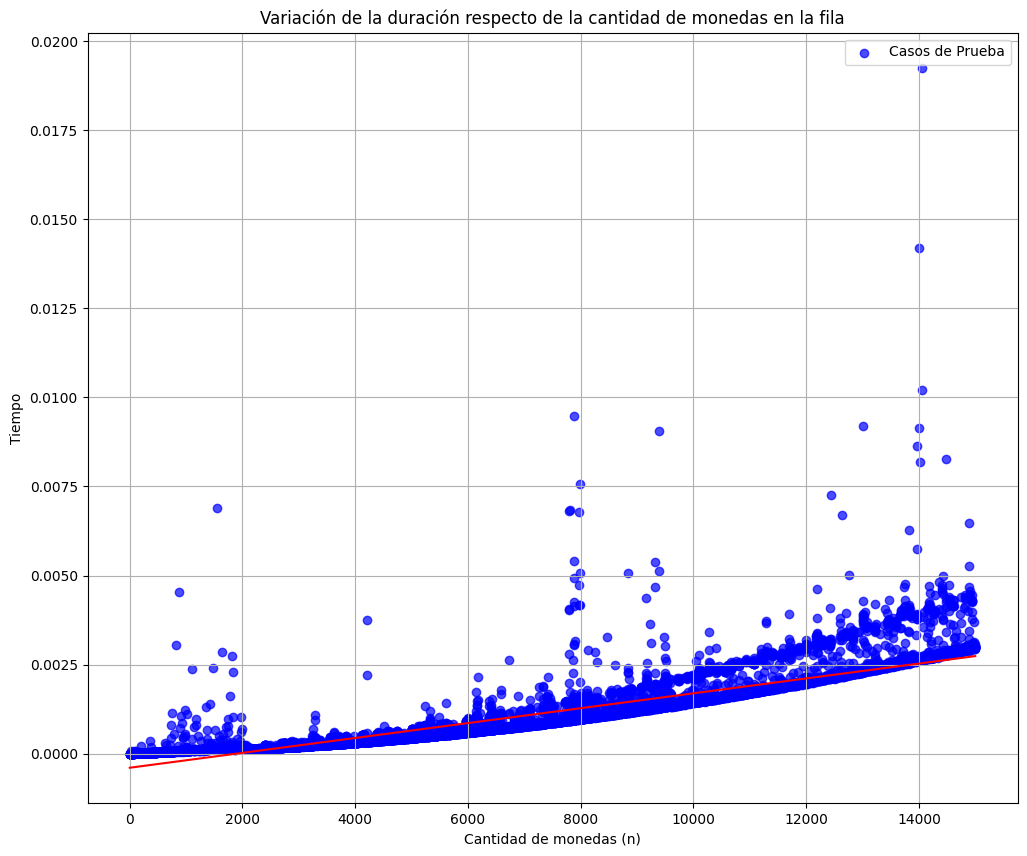

In [4]:
def generate_random_array(n, min_val, max_val):
    if n <= 0:
        return []  
    
    array = [random.randint(min_val, max_val) for _ in range(n)]
    return array

def main_1():
    times = []
    amount = []
    for j  in range(15000):
        coins = generate_random_array(j+1, 1, 1000)
        t = 0
        amount.append(j+1)
        for i in range(3):  
            time = play_the_game(coins) 
            t += time
        times.append(t / 3) 
    
    plot_least_squares(amount, times)  

def plot_least_squares(amount, times):
    coef = np.polyfit(amount, times, 1)  
    poly1d_fn = np.poly1d(coef)
    
 
    plt.figure(figsize=(12, 10))
    plt.scatter(amount, times, label='Casos de Prueba', color='blue', alpha=0.7)
    plt.plot(amount, poly1d_fn(amount), 'r')
    plt.title('Variación de la duración respecto de la cantidad de monedas en la fila')
    plt.xlabel('Cantidad de monedas (n)')
    plt.ylabel('Tiempo')
    plt.legend()
    plt.grid(True)
    plt.show()


main_1()

GRAFICO 3

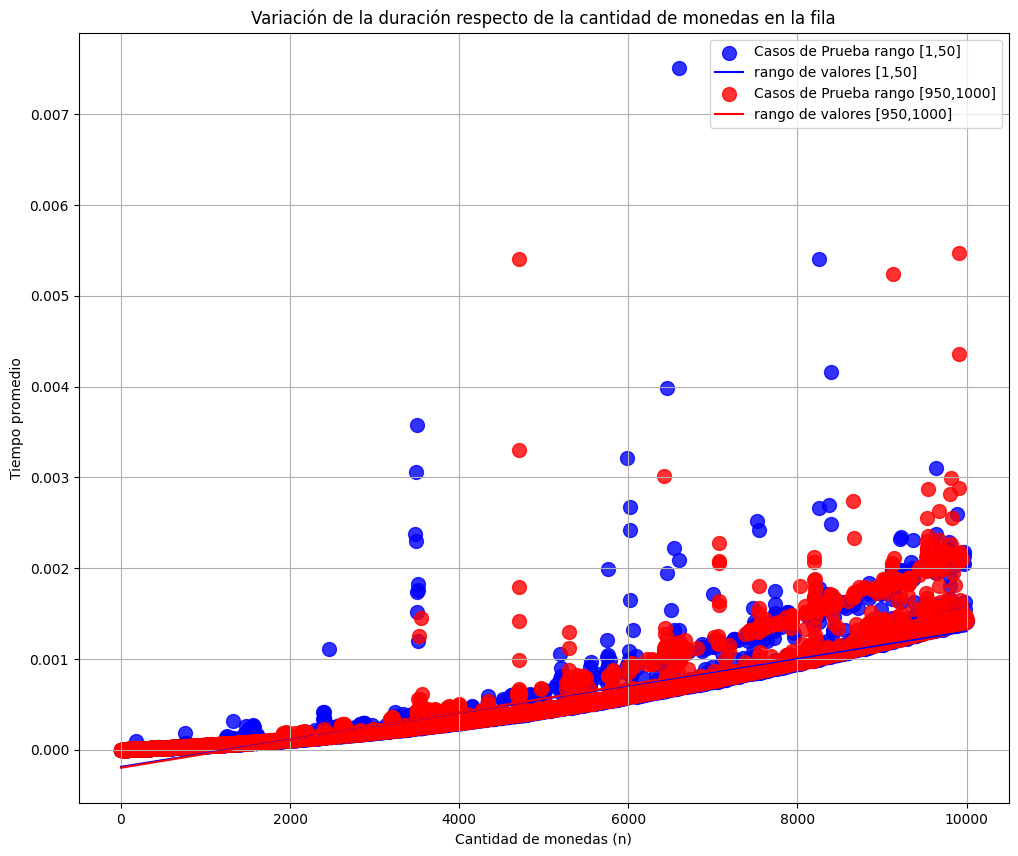

In [5]:
def generate_random_array(n, min_val, max_val):
    if n <= 0:
        return []  
    array = [random.randint(min_val, max_val) for _ in range(n)]
    return array

def main_2():
    times1 = []
    times2 = []
    amount = []
    for j  in range(10000):
        coins = generate_random_array(j+1, 1, 50)
        t = 0
        amount.append(j+1)
        for i in range(3):  
            time = play_the_game(coins) 
            t += time
        times1.append(t / 3)  
        
    for j  in range(10000):
        coins = generate_random_array(j+1, 950, 1000)
        t = 0
        for i in range(3): 
            time = play_the_game(coins)  
            t += time
        times2.append(t / 3)  
    
    plot_two_datasets(amount, times1, times2)  


def plot_two_datasets(amount, time1, time2):
    coef1 = np.polyfit(amount, time1, 1)
    poly1d_fn1 = np.poly1d(coef1)
    
    coef2 = np.polyfit(amount, time2, 1)
    poly1d_fn2 = np.poly1d(coef2)

    plt.figure(figsize=(12, 10))
    
    plt.scatter(amount, time1, label='Casos de Prueba rango [1,50]', color='blue', s=100, alpha=0.8)
    plt.plot(amount, poly1d_fn1(amount), 'b', label='rango de valores [1,50]')
    
    plt.scatter(amount, time2, label='Casos de Prueba rango [950,1000]', color='red', s=100, alpha=0.8)
    plt.plot(amount, poly1d_fn2(amount), 'red', label='rango de valores [950,1000]')
    
    plt.title('Variación de la duración respecto de la cantidad de monedas en la fila')
    plt.xlabel('Cantidad de monedas (n)')
    plt.ylabel('Tiempo promedio')
    plt.legend()
    plt.grid(True)
    plt.show()

main_2()